# Chapter 9

## Deep Learning with `tensorflow 2.0`

checking tensorflow version installed

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


importing tensorflow libraries and the local copy of banknote data

In [2]:

import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

banknote_data = pd.read_csv("bank_notes.csv")
banknote_data.head()


,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


plotting a count plot to see the distribution of the data and its values

<AxesSubplot:xlabel='Target', ylabel='count'>

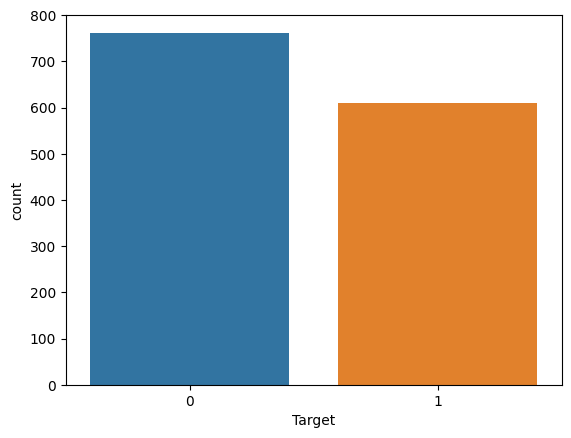

In [3]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

banknote_data = pd.read_csv("bank_notes.csv")
#here the number of fake bank notes, 1, is slightly less than the number of genuine ones, 0
sns.countplot(x="Target",data=banknote_data)
#our task is to predict the values for the "Target" column in our dataset based on the values
#in the first four columns

dividing the data into features and target labels

In [4]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

banknote_data = pd.read_csv("bank_notes.csv")

#variable X contains the feature set
#variable Y contains target labels
X = banknote_data.drop(["Target"],axis=1).values
Y = banknote_data[["Target"]].values

print(X.shape)
print(Y.shape)

(1372, 4)
(1372, 1)


Deep learning models require two datasets
- One is a training set, the data the model is trained on
- The other is a test set, the data the model is tested on

Here we shall split the total data into an 80% training set and a 20% test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

this code will scale the data for the training and test sets

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

to create a neural network, you can use the sequential class from the tensoflow keras models module
- to add layers to the model, call the add method and pass your layer to it
- to create a dense layer, you can use the Dense class


the first parameter is the Dense class is the number of nodes in the dense layer
- the second parameter is the dimension of the input
- the activaiton function can be defined by passing a string value to the activation attribute of the dense class
- the input dimensions are only required to be passed to the first dense layer
- subsequent dense layerse can calculate the input dimensions automatically from the number of nodes in the previous layers


this code defines a method create_model
- the model takes two parameters - learning_rate and dropout_rate
- inside the model we create an object of the sequential class and add three dense layers to the model
- the layers contain 12, 6 and 1 nodes respectively
- after each dense layer, we add a dropout layer with a dropout rate of 0.1
- adding dropout after each layer avoids overfitting


after you create the model, you need to compile it via the compile method
- the compile method takes the loss function, the optimiser and the metrics as parameters
- remember for binary classification, the activation function in the final dense layer with be sigmoid
- but the loss function in the compile method will be binary_crossentropy

In [7]:
def create_model (learning_rate, dropout_rate):

    #create sequential model
    model = Sequential()
    
    #adding dense layers
    model.add(Dense(12,input_dim=X_train.shape[1],activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(6,activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation="sigmoid"))

    #compiling the model
    adam = Adam(lr=learning_rate)
    model.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])
    return model

next we need to define:
- the default dropout rate
- learning rate batch size
- the number of epochs
- the number of epochs refers to the number of times the whole dataset is used for training
- the batch size referes to the number of records after which the weights are updated

In [8]:
dropout_rate = 0.1
epochs = 20
batch_size = 4
learn_rate = 0.001

In [9]:
#this code creates our model

model = create_model(learn_rate, dropout_rate)

c:\Users\Tim\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


we can view the model architecture via the plot_model() method of the tensoflow keras utils module

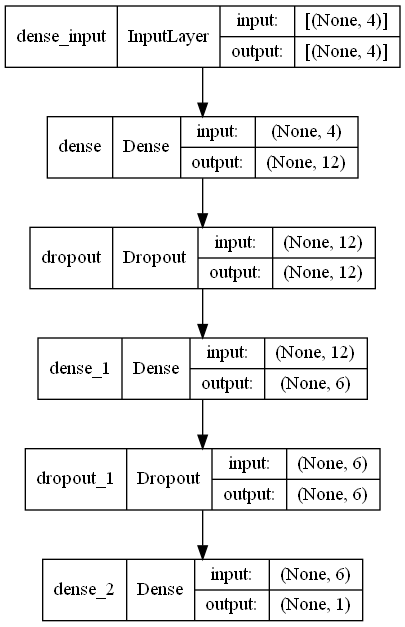

In [10]:
from tensorflow.keras.utils import plot_model

plot_model(model,to_file="model_plot1.png",show_shapes=True,show_layer_names=True)

#this output below shows that the input layer contains four nodes
#the input to the first dense layer is four, while the output is 12
#similarly the inpyt to the second dnese layer is 12, while the output is 6
#finally in the last dense layer, the input is 6 nodes, while the output is 1 since we are making binary classification
#also you can see a dropout layer after each dense layer

to train the model, you need to call the fit method on the model object
- the fit method takes the training features and targets as parameters
- along with the batch size, number of epochs, and the validation split
- the validation split refers to the split in the training data during training

In [11]:
model_history = model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_split=0.2,verbose=1)

#our neural network is now trained, the val_accuracy of 1.0 in the last epoch shows that
#on the training set, our neural network is making predictions with 100% accuracy

Epoch 1/20
220/220 [==============================] - 1s 2ms/step - loss: 0.5435 - accuracy: 0.7913 - val_loss: 0.4407 - val_accuracy: 0.8773
Epoch 2/20
220/220 [==============================] - 0s 1ms/step - loss: 0.3683 - accuracy: 0.8826 - val_loss: 0.2699 - val_accuracy: 0.9273
Epoch 3/20
220/220 [==============================] - 0s 1ms/step - loss: 0.2513 - accuracy: 0.9270 - val_loss: 0.1682 - val_accuracy: 0.9409
Epoch 4/20
220/220 [==============================] - 0s 1ms/step - loss: 0.1713 - accuracy: 0.9498 - val_loss: 0.1062 - val_accuracy: 0.9682
Epoch 5/20
220/220 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.9578 - val_loss: 0.0754 - val_accuracy: 0.9864
Epoch 6/20
220/220 [==============================] - 0s 1ms/step - loss: 0.1034 - accuracy: 0.9681 - val_loss: 0.0525 - val_accuracy: 0.9955
Epoch 7/20
220/220 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9669 - val_loss: 0.0452 - val_accuracy: 0.9864
Epoch 

evaluating neural network performance
- we can now evaluate its performance by making predictions on the test set
- to make predictions on the test set, you have to pass the set to the evaluate() method of the model
- as shown below:

In [12]:
accuracies = model.evaluate(X_test, Y_test, verbose=1)
print("Test Score: ", accuracies[0])
print("Test Accuracy: ", accuracies[1])

#the output shows an accuracy of 100% on the test set
#the loss value of 0.0114 is shown
#remeber, the lower the loss, the higher the accuracy

9/9 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9964
Test Score:  0.015216519124805927
Test Accuracy:  0.996363639831543


lets now plot the accuracy on the training and test sets to see if our model is overfitting or not

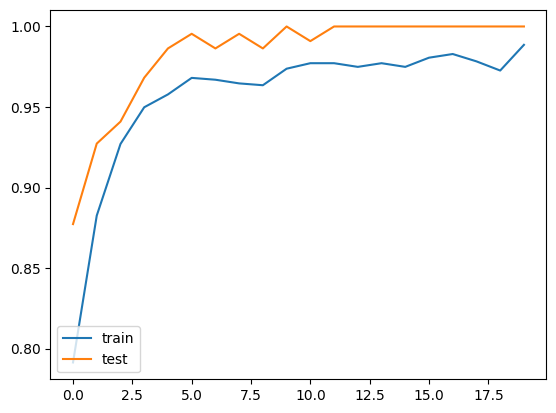

In [13]:
import matplotlib.pyplot as plt

plt.plot(model_history.history["accuracy"],label="accuracy")
plt.plot(model_history.history["val_accuracy"],label="val_accuracy")
plt.legend(["train","test"],loc="lower left")

#the above curve meets near 1 and then becomes stable, showing that our model is not overfitting

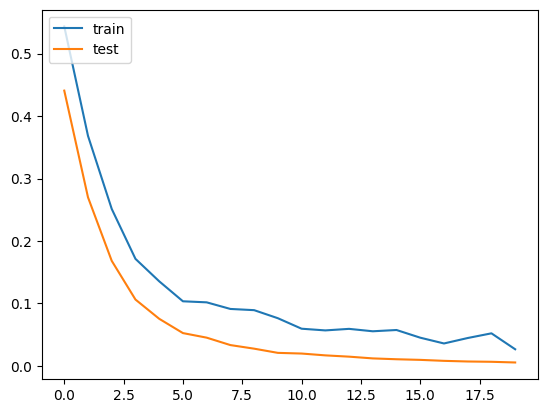

In [14]:
#the loss values for test and training sets can be printed as follows:

plt.plot(model_history.history["loss"],label="loss")
plt.plot(model_history.history["val_loss"],label="val_loss")
plt.legend(["train","test"],loc="upper left")

# 9.2 - Recurrent Neural Networks RNN


What is a RNN?
- A RNN is a type of neural network that is used to process data that is sequential in nature
- e.g. stock price, text sentences or sales of items
- Sequential data is a type of data where the value of data at time step T depends upon the values of data
- at timestaps less than T. For instances: sound waves, text sentences, stock market prices etc.
- In the stock market price prediction problem, the value of the opening price of a stock at a given data depends upon the opening stock price of the previous days.
- The difference between the architecture of a RNN and a simple neural network is as follows:
- In a RNN at each time step, the previous output of the neuron is also multiplies by the current input via a weight vector.


Problems with RNN
- One problem with RNNs is that while it can capture a shorter sequence, it tends to forget longer sequences
- For instance, it is easier to predict the missing word in the following sentence 'birds fly in the __' because the Key-word birds is present in the same sentence
- RNN can easily guess that the missing word is clouds here
- However RNN cannot remeber longer sentences
- The RNN has multiple recurrent layers, resulting in a diminishing gradient problem
- The diminishing gradient problem is that during the backpropagation of the recurrent layer, the gradient of the eariler layer becomes infinitesimally small, which virtually makes neural network initial layers stop from learning anything
- To solve this problem, a special type of RNN, a Long Short-Term Memory LSTM has been developed


What is an LSTM?
- LSTM is a type of RNN capable of remembering longer seuqneces, and is therefore one of the most commonly used RNN for sequence tasks.
- In LSTM instead of a single unit in the recurrent cell, there are four interacting units i.e.
- a forget gate, an input gate, an update gate and an output gate.
- The architecture of a LSTM cell is as follows:


Cell state
- Responsible for remembering a long sequence
- Contains data from all previous cells in the sequence. 
- LSTM is capable of adding or removing information to a cell state.
- In other fords LSTM tells the cell state which part of previous information to remember or forget


Forget gate
- Tells the cell state which information to retain or forget from the previous step


Input gate
- Updates or adds new information in the cell sate. There are two parts
- Input layer - decides which part of the cell state is to be upadted
- Tanh layer - creates a vector of new values that are added or replaced in the cell state


Update gate
- Performs the operations of the forget and input gates


Output gate
- Ouputs the hidden state and the ouput, like a common recurrent neural network
- The additional ouput here is a cell satate

# 9.3 - predicting future stock prices via LSTM in Keras

here we we will predict the opening stock price of Meta

In this section we will train the stock prediction model on the training set

In [16]:
#here we import the dataset
import pandas as pd
import numpy as np

meta_complete_data = pd.read_csv("META.csv")

In [17]:
#printing dataset header
meta_complete_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [18]:
#here we are only interested in the open column, so we will select this from the dataset

meta_training_processed = meta_complete_data[["Open"]].values

In [19]:
#scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

meta_training_scaled = scaler.fit_transform(meta_training_processed)

len(meta_training_scaled)
#this output shows there are 2589 records

2589

- we need to divide the dataset into features and label
- we are predicting the following day's data based off of the previous 60 days' values
- the featur set will consist of 60 timestamps of 1 feature
- the feature set is the stock price of the past 60 days
- the label set will be the stock price on the 61st day
- based on the opening stock prices of the previous days, we will be predict the opening stock price for the next day

In [20]:
#training features are the last 60 days
#training labels are the data of the 61st day

meta_training_features = []
meta_training_labels = []

for i in range(60,len(meta_training_scaled)):
    meta_training_features.append(meta_training_scaled[i-60:i,0])
    meta_training_labels.append(meta_training_scaled[i,0])

In [21]:
#converting training data to numpy arrays
metaX_train = np.array(meta_training_features)
metaY_train = np.array(meta_training_labels)

In [22]:
#printing the shape of the dataset
print(metaX_train.shape)
print(metaY_train.shape)

(2529, 60)
(2529,)


In [23]:
#we need to reshape the input features into a 3-dimensional format

metaX_train = np.reshape(metaX_train,(metaX_train.shape[0],metaX_train.shape[1],1))

the following code creates the LSTM model
- we have 4 LSTM layers with 100 nodes each
- each LSTM layer is followed by a dropout layer to avoid overfitting
- the final dense has one node since the output is a single value

In [24]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout, LSTM
from tensorflow.keras.models import Model

#defining the LSTM network
input_layer = Input(shape = (metaX_train.shape[1],1))
lstm1 = LSTM(100,activation="relu",return_sequences=True)(input_layer)
do1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(100,activation="relu",return_sequences=True)(do1)
do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100,activation="relu",return_sequences=True)(do2)
do3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(100,activation="relu")(do3)
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)
model = Model(input_layer,output_layer)
model.compile(optimizer="adam",loss="mse")

In [25]:
#next we need to convert the output metaY into a column vector

print(metaX_train.shape)
print(metaY_train.shape)
metaY_train = metaY_train.reshape(-1,1)
print(metaY_train.shape)


(2529, 60, 1)
(2529,)
(2529, 1)


In [26]:
#the following script trains our stock price prediction model on the training set
#number of epochs (training routines) = 100

meta_model_history = model.fit(metaX_train,metaY_train,epochs=100,verbose=1,batch_size=32)


Epoch 1/100
80/80 [==============================] - 17s 156ms/step - loss: 0.0167
Epoch 2/100
80/80 [==============================] - 12s 151ms/step - loss: 0.0035
Epoch 3/100
80/80 [==============================] - 10s 128ms/step - loss: 0.0029
Epoch 4/100
80/80 [==============================] - 10s 124ms/step - loss: 0.0033
Epoch 5/100
80/80 [==============================] - 10s 120ms/step - loss: 0.0026
Epoch 6/100
80/80 [==============================] - 10s 126ms/step - loss: 0.0025
Epoch 7/100
80/80 [==============================] - 10s 120ms/step - loss: 0.0024
Epoch 8/100
80/80 [==============================] - 10s 119ms/step - loss: 0.0028
Epoch 9/100
80/80 [==============================] - 10s 119ms/step - loss: 0.0022
Epoch 10/100
80/80 [==============================] - 9s 119ms/step - loss: 0.0022
Epoch 11/100
80/80 [==============================] - 11s 133ms/step - loss: 0.0020
Epoch 12/100
80/80 [==============================] - 11s 135ms/step - loss: 0.0022
Ep

testing the stock prediction model
- the test data should also be converted into the right shape to test the model
- first import the data and remove all the columns from the test data except the Open column

In [27]:
meta_testing_complete_data = pd.read_csv("META.csv")

meta_testing_processed = meta_testing_complete_data[["Open"]].values

let's concatenate the training and test sets
- we do this to predict the first value in the test set
- the input will be the data from the past 60 days (the data from the last 60 days in the training set)

In [28]:
meta_all_data = pd.concat((meta_complete_data["Open"],meta_testing_complete_data["Open"]),axis=0)

In [29]:
#the following script creates our final input feature set

test_inputs = meta_all_data[len(meta_all_data) - len(meta_testing_complete_data) - 60:].values
print(test_inputs.shape)

(2649,)


In [50]:
#scaling the data and converting it into a column vector

test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

(2649, 1)
2649


In [51]:
#just like the training data, we need to divide our input data into features and labels

meta_test_features = []
for i in range(60,test_inputs.shape[0]):
    meta_test_features.append(test_inputs[i-60:i,0])


In [39]:
#printing the feature set

metaX_test = np.array(meta_test_features)
print(metaX_test.shape)

(2589, 60)


the feature set is currently 2-dimensional
- but the LSTM algorithm in Keras accepts only data in 3-dimensions
- this code converts the input features into a 3D shape

In [40]:
metaX_test = np.reshape(metaX_test,(metaX_test.shape[0],metaX_test.shape[1],1))
print(metaX_test.shape)

(2589, 60, 1)


In [41]:
#now we make predicts on the test set

metaY_pred = model.predict(metaX_test)

In [42]:
#since we scaled our input feature, we need to apply the inverse_transform method of the scaler object
#on the predicted output to get the original values

metaY_pred = scaler.inverse_transform(metaY_pred)

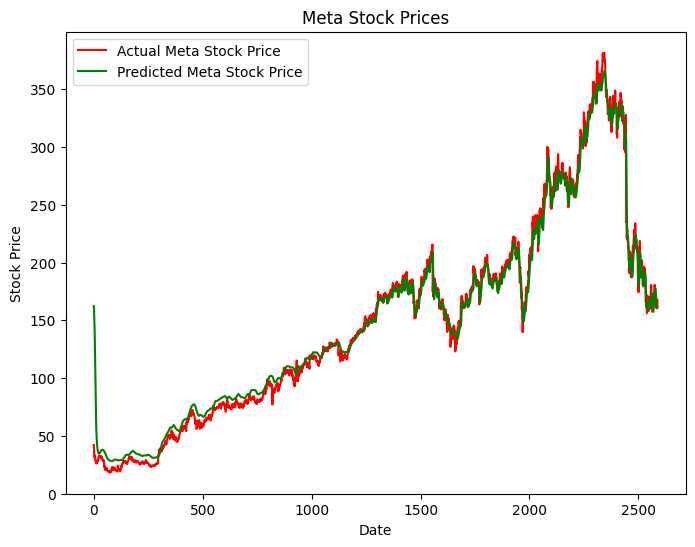

In [52]:
#finally to compare the predicted output with the actual stock values, we can plot the two values on a chart

from turtle import color

plt.figure(figsize=(8,6))
plt.plot(meta_testing_processed,color="red",label="Actual Meta Stock Price")
plt.plot(metaY_pred,color="green",label="Predicted Meta Stock Price")
plt.title("Meta Stock Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()